## 1. Carga y visualización de la serie temporal

In [ ]:
# Importamos las librerías
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Cargamos los datos del fichero CSV
df = pd.read_csv('wavedata.csv')
df.columns = ['waveht']

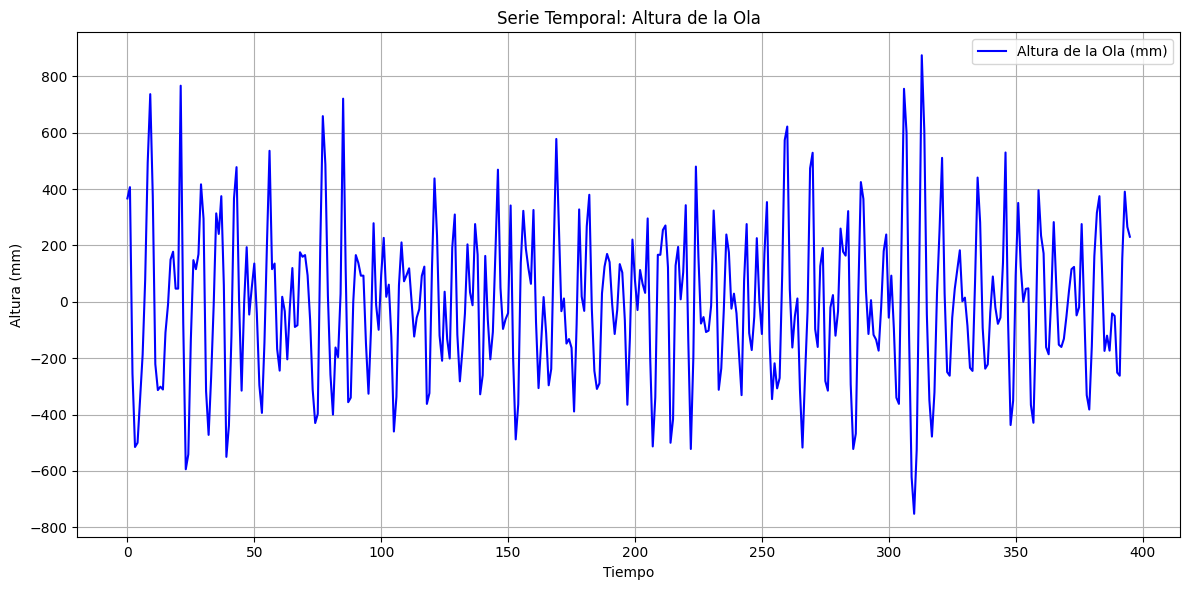

In [5]:
# Visualización de la Serie Temporal
plt.figure(figsize=(12, 6))
plt.plot(df['waveht'], color='blue', label='Altura de la Ola (mm)')
plt.title('Serie Temporal: Altura de la Ola')
plt.xlabel('Tiempo')
plt.ylabel('Altura (mm)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## 2. Gráficos de ACF y PACF

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

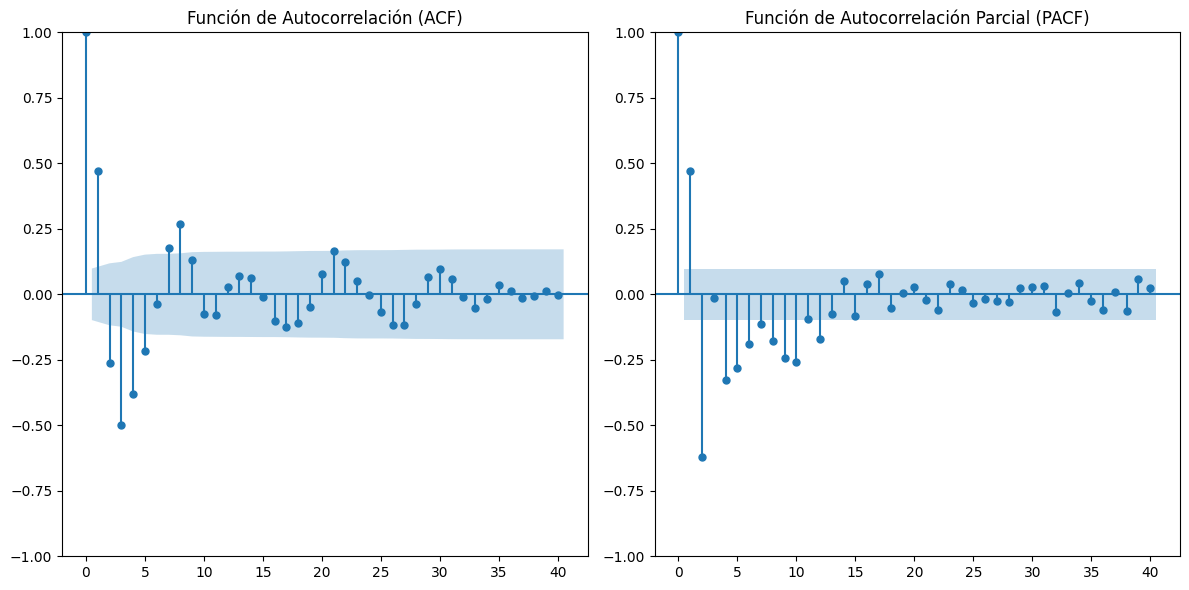

In [8]:
# Visaulización de ACF
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_acf(df['waveht'], lags=40, ax=plt.gca())
plt.title('Función de Autocorrelación (ACF)')

# Visualización de PACF
plt.subplot(1, 2, 2)
plot_pacf(df['waveht'], lags=40, ax=plt.gca(), method='ywm')
plt.title('Función de Autocorrelación Parcial (PACF)')
plt.tight_layout()
plt.show()

## 3. Selección del mejor modelo ARMA(p,q) por AIC

In [9]:
import warnings
from statsmodels.tsa.arima.model import ARIMA

In [12]:
warnings.filterwarnings("ignore")

# Inicializamos variables para almacenar el mejor modelo
best_aic = float("inf")
best_order = None
best_model = None

# Probamos diferentes combinaciones de p y q entre 0 y 4
for p in range(5):
    for q in range(5):
        try:
            model = ARIMA(df['waveht'], order=(p, 0, q)).fit()
            if model.aic < best_aic:
                best_aic = model.aic
                best_order = (p,0,q)
                best_model = model
        except:
            continue

print(f"Mejor modelo ARMA(p,q) según AIC: {best_order} con AIC = {best_aic:.2f}")

Mejor modelo ARMA(p,q) según AIC: (4, 0, 4) con AIC = 5059.77


## 4. Ajuste del modelo ARMA(4,0,4)

In [13]:
arma_model = ARIMA(df['waveht'], order=(4, 0, 4)).fit()
print(arma_model.summary())

                               SARIMAX Results                                
Dep. Variable:                 waveht   No. Observations:                  396
Model:                 ARIMA(4, 0, 4)   Log Likelihood               -2519.886
Date:                Thu, 09 Oct 2025   AIC                           5059.772
Time:                        21:38:29   BIC                           5099.586
Sample:                             0   HQIC                          5075.545
                                - 396                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.8735      0.836     -5.831      0.000      -6.512      -3.235
ar.L1          2.3349      0.102     22.844      0.000       2.135       2.535
ar.L2         -2.5259      0.208    -12.173      0.0

## 5. Análisis de los residuos

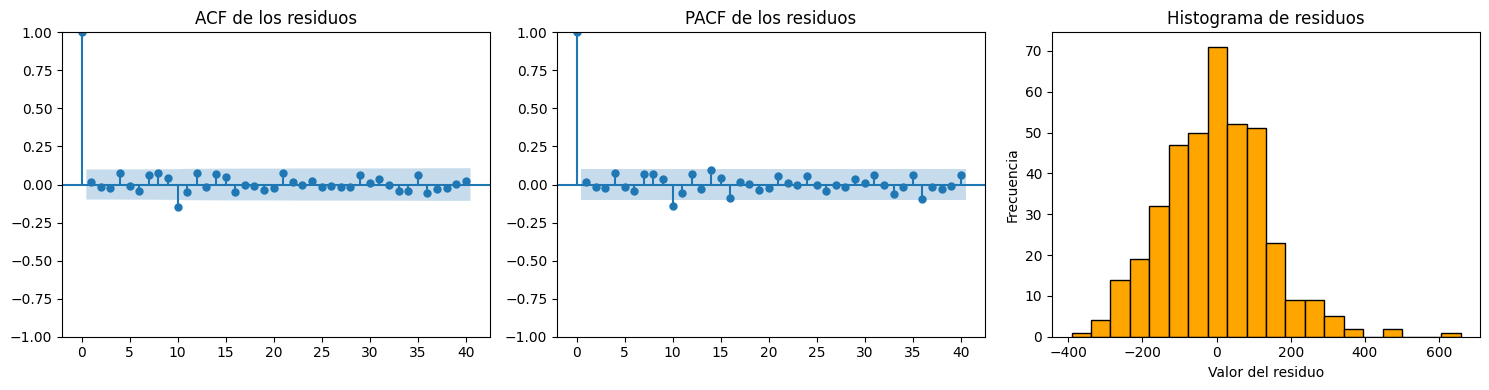

In [14]:
residuals = arma_model.resid[4:]  # eliminar primeros 4 rezagos

plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plot_acf(residuals, lags=40, ax=plt.gca())
plt.title('ACF de los residuos')

plt.subplot(1, 3, 2)
plot_pacf(residuals, lags=40, ax=plt.gca(), method='ywm')
plt.title('PACF de los residuos')

plt.subplot(1, 3, 3)
plt.hist(residuals, bins=20, color='orange', edgecolor='black')
plt.title('Histograma de residuos')
plt.xlabel('Valor del residuo')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

## 6. Predicciones de las siguientes 50 muestras

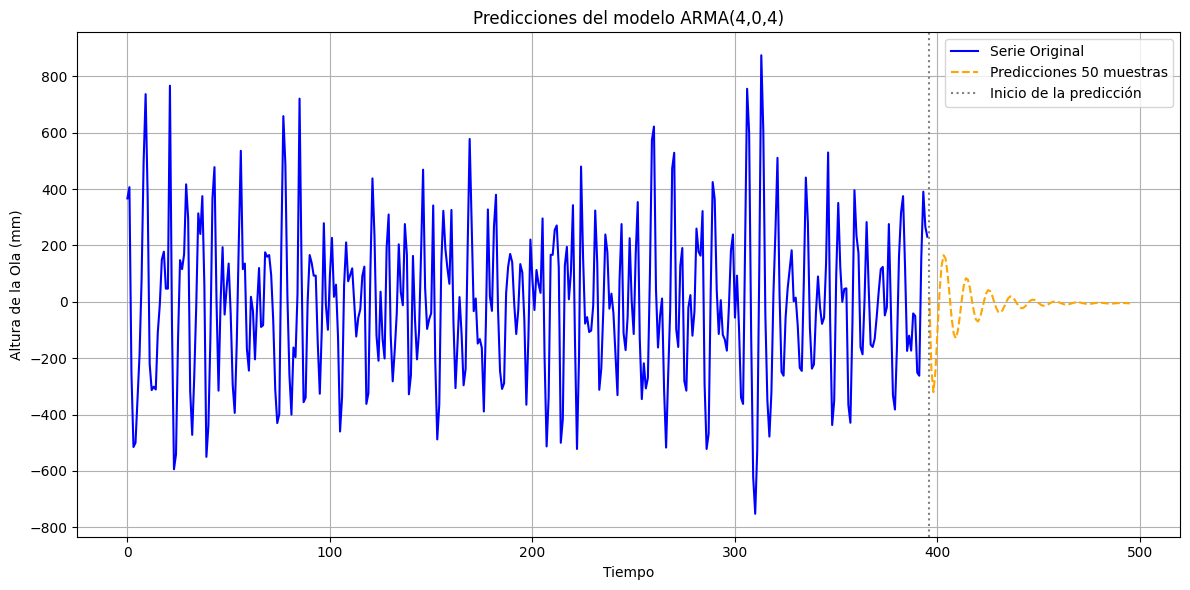

In [21]:
# ARMA model prediction de las siguientes 50 muestras
n_predicciones = 100
pred = arma_model.forecast(steps=n_predicciones)

# creamos una nueva serie estendida para graficar
serie_extendida = pd.concat([df['waveht'], pred])
indice_extendido = range(len(serie_extendida))

# Graficamos la serie original y las predicciones
plt.figure(figsize=(12, 6))
plt.plot(indice_extendido[:len(df)], df['waveht'], label='Serie Original', color='blue')
plt.plot(indice_extendido[len(df):], pred, label='Predicciones 50 muestras', color='orange', linestyle='--')
plt.axvline(x=len(df), color='gray', linestyle=':', label='Inicio de la predicción')
plt.title('Predicciones del modelo ARMA(4,0,4)')
plt.xlabel('Tiempo')
plt.ylabel('Altura de la Ola (mm)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()